In [1]:
!pip install ktrain

In [2]:
import ktrain
from ktrain import text

## Loading data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ls /content/drive/MyDrive/Uni_Köln/Masterarbeit/Model/KERAS/GeneratedFiles2/

test/  train/


In [5]:
%%time
trn, val, preproc = text.texts_from_folder("/content/drive/MyDrive/Uni_Köln/Masterarbeit/Model/KERAS/GeneratedFiles/", 
                                           max_features=20000, maxlen=512, 
                                           ngram_range=1, 
                                           preprocess_mode='standard',
                                           classes=['central', 'halbLinks', 'halbRechts', 'rechts', 'links'])

detected encoding: utf-8
language: de
Word Counts: 400882
Nrows: 24000
24000 train sequences
train sequence lengths:
	mean : 429
	95percentile : 1315
	99percentile : 2505
x_train shape: (24000,512)
y_train shape: (24000, 5)
Is Multi-Label? False
6000 test sequences
test sequence lengths:
	mean : 436
	95percentile : 1321
	99percentile : 2542
x_test shape: (6000,512)
y_test shape: (6000, 5)
CPU times: user 31.6 s, sys: 4.99 s, total: 36.6 s
Wall time: 1h 38min 53s


## Inspection of available classifiers

In [6]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


### Applying the fasttext model (mod_17):

In [7]:
fasttext = text.text_classifier("fasttext", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [8]:
learner_ft = ktrain.get_learner(fasttext, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
750/750 [==============================] - 14s 15ms/step - loss: 2.1530 - accuracy: 0.2016
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 2.1405 - accuracy: 0.2019
Epoch 3/5
750/750 [==============================] - 11s 15ms/step - loss: 1.8911 - accuracy: 0.2209
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 1.4936 - accuracy: 0.3448
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 1.6937 - accuracy: 0.1963


done.
Visually inspect loss plot and select learning rate associated with falling loss


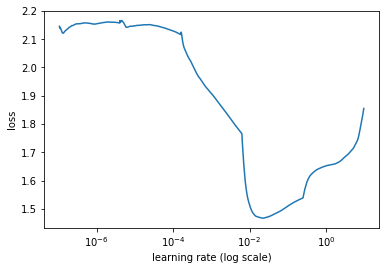

In [9]:
learner_ft.lr_find(show_plot=True, max_epochs=5)

In [10]:
learner_ft.lr_estimate()

(0.0053917826, 0.0021864132955670356)

In [11]:
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
750/750 [==============================] - 12s 16ms/step - loss: 1.6008 - accuracy: 0.2942 - val_loss: 1.2882 - val_accuracy: 0.5130
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 1.3203 - accuracy: 0.4549 - val_loss: 1.1167 - val_accuracy: 0.6030
Epoch 3/5
750/750 [==============================] - 11s 15ms/step - loss: 1.1714 - accuracy: 0.5381 - val_loss: 0.9960 - val_accuracy: 0.6475
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 1.0678 - accuracy: 0.5893 - val_loss: 0.9123 - val_accuracy: 0.6723
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 0.9950 - accuracy: 0.6258 - val_loss: 0.8774 - val_accuracy: 0.6908


In [12]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
750/750 [==============================] - 11s 15ms/step - loss: 0.9359 - accuracy: 0.6518 - val_loss: 0.8319 - val_accuracy: 0.6973
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.8819 - accuracy: 0.6786 - val_loss: 0.7979 - val_accuracy: 0.7202
Epoch 3/5
750/750 [==============================] - 11s 15ms/step - loss: 0.8348 - accuracy: 0.6983 - val_loss: 0.7814 - val_accuracy: 0.7233
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 0.7989 - accuracy: 0.7113 - val_loss: 0.7593 - val_accuracy: 0.7303
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 0.7580 - accuracy: 0.7298 - val_loss: 0.7515 - val_accuracy: 0.7308


In [13]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
750/750 [==============================] - 11s 15ms/step - loss: 0.7346 - accuracy: 0.7363 - val_loss: 0.7441 - val_accuracy: 0.7345
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.7030 - accuracy: 0.7504 - val_loss: 0.7284 - val_accuracy: 0.7375
Epoch 3/5
750/750 [==============================] - 11s 15ms/step - loss: 0.6789 - accuracy: 0.7583 - val_loss: 0.7183 - val_accuracy: 0.7440
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 0.6548 - accuracy: 0.7670 - val_loss: 0.7136 - val_accuracy: 0.7437
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 0.6341 - accuracy: 0.7750 - val_loss: 0.7009 - val_accuracy: 0.7498


In [14]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
750/750 [==============================] - 11s 15ms/step - loss: 0.6157 - accuracy: 0.7835 - val_loss: 0.6918 - val_accuracy: 0.7532
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.5996 - accuracy: 0.7898 - val_loss: 0.6866 - val_accuracy: 0.7502
Epoch 3/5
750/750 [==============================] - 11s 15ms/step - loss: 0.5824 - accuracy: 0.7963 - val_loss: 0.6793 - val_accuracy: 0.7620
Epoch 4/5
750/750 [==============================] - 11s 15ms/step - loss: 0.5695 - accuracy: 0.7999 - val_loss: 0.6706 - val_accuracy: 0.7645
Epoch 5/5
750/750 [==============================] - 12s 16ms/step - loss: 0.5498 - accuracy: 0.8083 - val_loss: 0.6698 - val_accuracy: 0.7618


## Applying the logreg model: (mod_18)

In [15]:
logreg = text.text_classifier("logreg", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [16]:
learner_log = ktrain.get_learner(logreg, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 1.6540 - accuracy: 0.1852
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 1.6465 - accuracy: 0.1856
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 1.6188 - accuracy: 0.2072
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 1.5236 - accuracy: 0.3437
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 1.2290 - accuracy: 0.6129
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.7904 - accuracy: 0.7779
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.7618 - accuracy: 0.7932
Epoch 8/10
750/750 [==============================] - 0s 265us/step - loss: 2.2755 - accuracy: 0.7250


done.
Visually inspect loss plot and select learning rate associated with falling loss


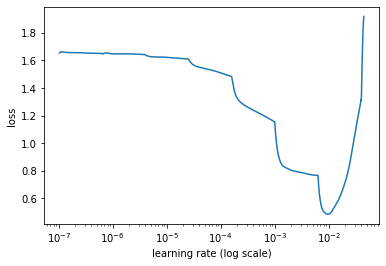

In [17]:
learner_log.lr_find(show_plot=True, max_epochs=10)

In [18]:
learner_log.lr_estimate()

(0.0009244146, 0.0009602866135537625)

In [19]:
learner_log.fit(learner_log.lr_estimate()[1], 10)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 1.0755 - accuracy: 0.6200 - val_loss: 0.8643 - val_accuracy: 0.7138
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.6046 - accuracy: 0.8465 - val_loss: 0.7541 - val_accuracy: 0.7497
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4361 - accuracy: 0.9061 - val_loss: 0.7035 - val_accuracy: 0.7653
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3358 - accuracy: 0.9383 - val_loss: 0.6814 - val_accuracy: 0.7725
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2674 - accuracy: 0.9594 - val_loss: 0.6859 - val_accuracy: 0.7747
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2170 - accuracy: 0.9712 - val_loss: 0.6814 - val_accuracy: 0.7802
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1779 - accuracy: 0.9797 - val_loss: 0.7055 - val_accuracy: 0.7833
Epoch 

## Applying the nbsvm model: (mod_19)

In [20]:
nbsvm = text.text_classifier("nbsvm", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-24000
computing log-count ratios...
done.


In [21]:
learner_nbsvm = ktrain.get_learner(nbsvm, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 1.6513 - accuracy: 0.2338
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 1.6478 - accuracy: 0.2391
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 1.6165 - accuracy: 0.2916
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 1.4840 - accuracy: 0.4440
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 1.1547 - accuracy: 0.6777
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.7554 - accuracy: 0.7811
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5231 - accuracy: 0.8345
Epoch 8/10
750/750 [==============================] - 2s 3ms/step - loss: 1.3983 - accuracy: 0.7694


done.
Visually inspect loss plot and select learning rate associated with falling loss


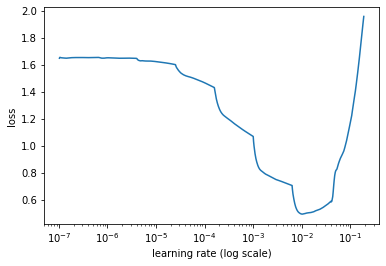

In [22]:
learner_nbsvm.lr_find(show_plot=True, max_epochs=10)

In [23]:
learner_nbsvm.lr_estimate()

(0.00092668785, 0.0010136020369827746)

In [24]:
learner_nbsvm.fit(learner_nbsvm.lr_estimate()[1], 10)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.9255 - accuracy: 0.7132 - val_loss: 0.8358 - val_accuracy: 0.7077
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.6234 - accuracy: 0.8151 - val_loss: 0.7609 - val_accuracy: 0.7287
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5226 - accuracy: 0.8438 - val_loss: 0.7311 - val_accuracy: 0.7410
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4610 - accuracy: 0.8635 - val_loss: 0.7181 - val_accuracy: 0.7420
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.4170 - accuracy: 0.8769 - val_loss: 0.7149 - val_accuracy: 0.7448
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3837 - accuracy: 0.8876 - val_loss: 0.7208 - val_accuracy: 0.7477
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3547 - accuracy: 0.8979 - val_loss: 0.7243 - val_accuracy: 0.7490
Epoch 

## Applying the bigru model: (mod_20)

In [25]:
bigru = text.text_classifier("bigru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
processing pretrained word vectors...
downloading pretrained word vectors to /root/ktrain_data ...
[██████████████████████████████████████████████████]
extracting pretrained word vectors...
done.

cleanup downloaded zip...
done.

loading pretrained word vectors...this may take a few moments...


done.


In [26]:
learner_bigru = ktrain.get_learner(bigru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
750/750 [==============================] - 88s 108ms/step - loss: 1.6345 - accuracy: 0.2126
Epoch 2/10
750/750 [==============================] - 81s 108ms/step - loss: 1.6319 - accuracy: 0.2131
Epoch 3/10
750/750 [==============================] - 81s 108ms/step - loss: 1.6158 - accuracy: 0.2310
Epoch 4/10
750/750 [==============================] - 81s 107ms/step - loss: 1.5898 - accuracy: 0.2885
Epoch 5/10
750/750 [==============================] - 80s 107ms/step - loss: 1.3663 - accuracy: 0.4767
Epoch 6/10
750/750 [==============================] - 80s 107ms/step - loss: 0.6622 - accuracy: 0.7647
Epoch 7/10
750/750 [==============================] - 80s 107ms/step - loss: nan - accuracy: 0.7042
Epoch 8/10
750/750 [==============================] - 80s 107ms/step - loss: nan - accuracy: 0.1983
Epoch 9/10
750/750 [==============================] - 80s 107ms/step - loss: nan - accuracy: 0.1989

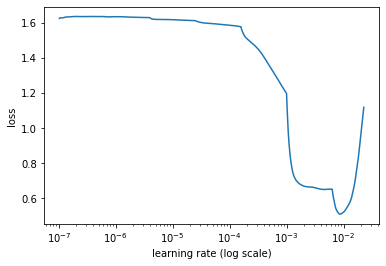

In [27]:
learner_bigru.lr_find(show_plot=True, max_epochs=10)

In [28]:
learner_bigru.lr_estimate()

(0.0009244146, 0.0022684749215841292)

In [29]:
learner_bigru.fit(learner_bigru.lr_estimate()[1], 7)

Epoch 1/7
750/750 [==============================] - 85s 111ms/step - loss: 0.8974 - accuracy: 0.6544 - val_loss: 0.6358 - val_accuracy: 0.7665
Epoch 2/7
750/750 [==============================] - 85s 113ms/step - loss: 0.3421 - accuracy: 0.8865 - val_loss: 0.5724 - val_accuracy: 0.8163
Epoch 3/7
750/750 [==============================] - 85s 113ms/step - loss: 0.0789 - accuracy: 0.9772 - val_loss: 0.6584 - val_accuracy: 0.8227
Epoch 4/7
750/750 [==============================] - 85s 114ms/step - loss: 0.0140 - accuracy: 0.9977 - val_loss: 0.7279 - val_accuracy: 0.8250
Epoch 5/7
750/750 [==============================] - 85s 113ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.8127 - val_accuracy: 0.8272
Epoch 6/7
750/750 [==============================] - 85s 113ms/step - loss: 6.5978e-04 - accuracy: 1.0000 - val_loss: 0.8590 - val_accuracy: 0.8272
Epoch 7/7
750/750 [==============================] - 84s 113ms/step - loss: 2.9056e-04 - accuracy: 1.0000 - val_loss: 0.9184 - val_a

## Applying the standard gru: (mod_21)

In [30]:
stgru = text.text_classifier("standard_gru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [31]:
learner_stgru = ktrain.get_learner(stgru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
750/750 [==============================] - 84s 110ms/step - loss: 1.6111 - accuracy: 0.2031
Epoch 2/10
750/750 [==============================] - 82s 109ms/step - loss: 1.6107 - accuracy: 0.2038
Epoch 3/10
750/750 [==============================] - 82s 109ms/step - loss: 1.6115 - accuracy: 0.1993
Epoch 4/10
750/750 [==============================] - 82s 109ms/step - loss: 1.6100 - accuracy: 0.2084
Epoch 5/10
750/750 [==============================] - 82s 110ms/step - loss: 1.5925 - accuracy: 0.2463
Epoch 6/10
750/750 [==============================] - 82s 110ms/step - loss: 1.4251 - accuracy: 0.3878
Epoch 7/10
750/750 [==============================] - 81s 108ms/step - loss: nan - accuracy: 0.2012
Epoch 8/10
750/750 [==============================] - 81s 108ms/step - loss: nan - accuracy: 0.1995
Epoch 9/10
750/750 [==============================] - 81s 108ms/step - loss: nan - accuracy: 0.1974

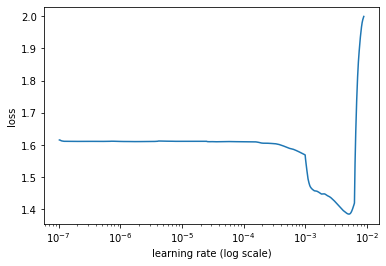

In [32]:
learner_stgru.lr_find(show_plot=True, max_epochs=10)

In [33]:
learner_stgru.lr_estimate()

(0.0009244146, 0.0008942675776779652)

In [34]:
learner_stgru.fit(learner_stgru.lr_estimate()[1], 10)

Epoch 1/7
750/750 [==============================] - 90s 118ms/step - loss: 1.5486 - accuracy: 0.2862 - val_loss: 1.3368 - val_accuracy: 0.4398
Epoch 2/7
750/750 [==============================] - 88s 118ms/step - loss: 1.3354 - accuracy: 0.4408 - val_loss: 1.1482 - val_accuracy: 0.5347
Epoch 3/7
750/750 [==============================] - 88s 117ms/step - loss: 0.9992 - accuracy: 0.6061 - val_loss: 0.9435 - val_accuracy: 0.6268
Epoch 4/7
750/750 [==============================] - 87s 116ms/step - loss: 0.7412 - accuracy: 0.7244 - val_loss: 0.8011 - val_accuracy: 0.6960
Epoch 5/7
750/750 [==============================] - 88s 117ms/step - loss: 0.6049 - accuracy: 0.7811 - val_loss: 0.7966 - val_accuracy: 0.7138
Epoch 6/7
750/750 [==============================] - 88s 117ms/step - loss: 0.5101 - accuracy: 0.8141 - val_loss: 0.6650 - val_accuracy: 0.7627
Epoch 7/7
750/750 [==============================] - 88s 117ms/step - loss: 0.4428 - accuracy: 0.8397 - val_loss: 0.7109 - val_accuracy: